# MAT 388, HW4

In [1]:
from scipy.io import loadmat
import yfinance as yf
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import tensorflow as tf
import tensorflow_datasets as tfds

from urllib.request import urlretrieve
from sklearn.preprocessing import MinMaxScaler, LabelBinarizer
from tensorflow.keras.layers import LSTM, ConvLSTM2D, BatchNormalization
from keras.models import Sequential
from keras.layers import Dense, Activation
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.feature_extraction.text import CountVectorizer

C:\Users\sahin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## Q1

For this question we are goint to use [CELEB_A](https://www.tensorflow.org/datasets/catalog/celeb_a) dataset through [tensorflow datasets](https://www.tensorflow.org/datasets).

1. Ingest the data, and select 10000 images from the dataset. Put the images under a variable called `X` and class labels (attributes) into `y`.
2. Build a neural network model for `X` against `Glasses` attribute in `y`.
3. Test the accuracy of your model using a 5-fold cross-validation. (I want a %95 confidence interval on the returned result using a t-test as I did in one of my lectures.)
4. Repeat Steps 2 and 3 for `Male` and `Bangs` attributes.
5. Compare your results for `Glasses`, `Male` and `Bangs`. Which one is better? Why? Explain.

In [2]:
# I couldn't get the data

a = tfds.load("celeb_a", split="train", shuffle_files=True)

a

Dl Completed...:  75%|███████▌  | 3/4 [00:01<00:00,  2.68 url/s]


DownloadError: Failed to get url https://doc-0s-84-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/63h8fbtrtt71st00tfb4f5cj9bcbm860/1671466950000/13182073909007362810/*/0B7EVK8r0v71pZjFTYXZWM3FlRnM?e=download&uuid=eadd9acd-0fc6-426c-b16c-09048376b79b. HTTP code: 429.

## Q2

For this question use the [Hyperspectral Image of Kennedy Space Center](https://www.ehu.eus/ccwintco/index.php/Hyperspectral_Remote_Sensing_Scenes#Kennedy_Space_Center_.28KSC.29).

1. Ingest the image data directly from the web. (No local files!)
2. Ingest the ground truth data directly from the web. (No local files!)
4. Build a convolutional neural network (preferably using [this](https://keras.io/api/layers/convolution_layers/) and/or [this](https://keras.io/api/layers/recurrent_layers/conv_lstm2d/)) model.
5. Test the accuracy of the model using a 5-fold cross-validation. (I want a %95 confidence interval on the returned result using a t-test as I did in one of my lectures.)

In [3]:
ksc_url = urlretrieve('http://www.ehu.es/ccwintco/uploads/2/26/KSC.mat', 'ksc_data.mat')
ksc_gt_url = urlretrieve('http://www.ehu.es/ccwintco/uploads/a/a6/KSC_gt.mat', 'ksc_gt.mat')

ksc = loadmat('ksc_data.mat')['KSC']
ksc_gt = loadmat('ksc_gt.mat')['KSC_gt']

In [4]:
X_train, X_test, y_train, y_test = train_test_split(ksc, ksc_gt, train_size=0.7)

X_train = np.reshape(X_train, (X_train.shape[0]*X_train.shape[1], X_train.shape[2], 1))
y_train = np.reshape(y_train, (y_train.shape[0]*y_train.shape[1]))


In [5]:
ConvLSTM2D_model = Sequential()

ConvLSTM2D_model.add(ConvLSTM2D(filters=40, kernel_size=(3, 3),
                   input_shape=(None, 358*614, 176, 1),
                   padding='same', return_sequences=True))
ConvLSTM2D_model.add(BatchNormalization())

ConvLSTM2D_model.add(ConvLSTM2D(filters=40, kernel_size=(3, 3),
                   padding='same', return_sequences=False))
ConvLSTM2D_model.add(BatchNormalization())

ConvLSTM2D_model.compile(loss='binary_crossentropy', optimizer='adadelta')

In [6]:
ConvLSTM2D_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv_lstm2d (ConvLSTM2D)    (None, None, 219812, 176  59200     
                             , 40)                               
                                                                 
 batch_normalization (BatchN  (None, None, 219812, 176  160      
 ormalization)               , 40)                               
                                                                 
 conv_lstm2d_1 (ConvLSTM2D)  (None, 219812, 176, 40)   115360    
                                                                 
 batch_normalization_1 (Batc  (None, 219812, 176, 40)  160       
 hNormalization)                                                 
                                                                 
Total params: 174,880
Trainable params: 174,720
Non-trainable params: 160
________________________________________________

In [7]:
ConvLSTM2D_model.compile(optimizer='adam',
                         loss='mean_squared_error')

In [8]:
X_train.shape

(219812, 176, 1)

In [9]:
y_train.shape

(219812,)

In [10]:
ConvLSTM2D_model.fit(X_train, y_train, batch_size=16, epochs=10)

Epoch 1/10


ValueError: in user code:

    File "C:\Users\sahin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\engine\training.py", line 1249, in train_function  *
        return step_function(self, iterator)
    File "C:\Users\sahin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\engine\training.py", line 1233, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\Users\sahin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\engine\training.py", line 1222, in run_step  **
        outputs = model.train_step(data)
    File "C:\Users\sahin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\engine\training.py", line 1023, in train_step
        y_pred = self(x, training=True)
    File "C:\Users\sahin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "C:\Users\sahin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\engine\input_spec.py", line 232, in assert_input_compatibility
        raise ValueError(

    ValueError: Exception encountered when calling layer 'sequential' (type Sequential).
    
    Input 0 of layer "conv_lstm2d" is incompatible with the layer: expected ndim=5, found ndim=3. Full shape received: (None, 176, 1)
    
    Call arguments received by layer 'sequential' (type Sequential):
      • inputs=tf.Tensor(shape=(None, 176, 1), dtype=uint16)
      • training=True
      • mask=None


## Q3

For this question we are going to use the time series of [Wheat Futures](https://finance.yahoo.com/quote/ZW=F/) from Yahoo Finance.

1. Ingest the data using [yfinance](https://pypi.org/project/yfinance/) Start from Jan 1, 2010 until Dec 31, 2021.
2. Construct [a RNN and/or a LSTM](https://keras.io/api/layers/recurrent_layers/) model on the data.
3. Test your model on the wheat futures data from Jan 1, 2022 to today using a 5-fold cross-validation. Did your model work? Explain.

In [11]:
train_wheatf = yf.download('ZW=F', start='2010-01-01', end='2021-12-31')[['Close']]
test_wheatf = yf.download('ZW=F', start='2022-01-01')[['Close']]

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [12]:
scaler = MinMaxScaler()

wheatf_df = pd.concat([train_wheatf, test_wheatf])
scaled_wheat = scaler.fit_transform(wheatf_df)

scaled_train_wheatf = scaled_wheat[:len(train_wheatf)]
scaled_test_wheatf = scaled_wheat[len(train_wheatf):]

In [13]:
X_train = []
y_train = []

for i in range(60, len(train_wheatf)):
    X_train.append(scaled_train_wheatf[i-60:i, 0])
    y_train.append(scaled_train_wheatf[i, 0])

In [14]:
X_train, y_train = np.array(X_train), np.array(y_train)

In [15]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [16]:
X_test = []
y_test = scaled_test_wheatf[60:, :]

for i in range(60, len(test_wheatf)):
    X_test.append(scaled_test_wheatf[i-60:i, 0])

X_test = np.array(X_test)

X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

In [17]:
LSTM_model = Sequential()
LSTM_model.add(LSTM(32, activation='relu', return_sequences=True, input_shape=(X_train.shape[1], 1)))
LSTM_model.add(LSTM(32, activation='relu', return_sequences=False))
LSTM_model.add(Dense(1))

In [18]:
LSTM_model.compile(optimizer='adam',
              loss='mean_squared_error')

In [19]:
LSTM_model.fit(X_train, y_train, batch_size=16, epochs=10, validation_data=(X_test,y_test))

Epoch 1/10
185/185 [==============================] - 8s 27ms/step - loss: 0.0049 - val_loss: 0.0055
Epoch 2/10
185/185 [==============================] - 5s 26ms/step - loss: 6.9943e-04 - val_loss: 0.0049
Epoch 3/10
185/185 [==============================] - 5s 26ms/step - loss: 5.7115e-04 - val_loss: 0.0019
Epoch 4/10
185/185 [==============================] - 5s 26ms/step - loss: 4.6761e-04 - val_loss: 0.0020
Epoch 5/10
185/185 [==============================] - 5s 26ms/step - loss: 4.1114e-04 - val_loss: 0.0017
Epoch 6/10
185/185 [==============================] - 5s 26ms/step - loss: 3.7665e-04 - val_loss: 0.0013
Epoch 7/10
185/185 [==============================] - 5s 27ms/step - loss: 3.4474e-04 - val_loss: 0.0018
Epoch 8/10
185/185 [==============================] - 5s 27ms/step - loss: 3.2754e-04 - val_loss: 0.0017
Epoch 9/10
185/185 [==============================] - 5s 27ms/step - loss: 2.9245e-04 - val_loss: 0.0017
Epoch 10/10
185/185 [==============================] - 5s 2

In [20]:
preds = LSTM_model.predict(X_test)
preds = scaler.inverse_transform(preds)

6/6 [==============================] - 0s 12ms/step


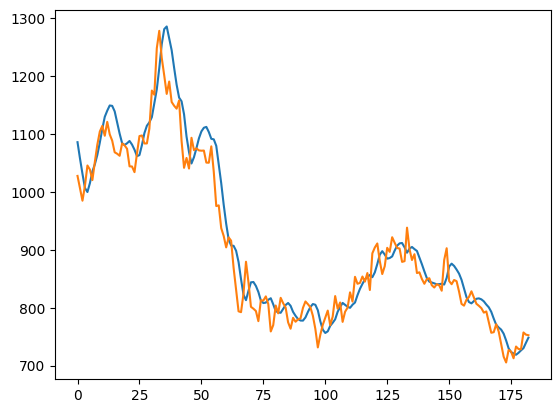

In [21]:
plt.figure()
plt.plot(preds)
plt.plot(test_wheatf.values[60:])

__LSTM model uses a value very close to the previous day to predict the next day. Therefore, we can say that this model can't predict the future.__

In [22]:
k_cv = KFold(n_splits=5)
score = cross_val_score(LSTM_model, test_wheatf, cv=k_cv, n_jobs=-1)

TypeError: If no scoring is specified, the estimator passed should have a 'score' method. The estimator <keras.engine.sequential.Sequential object at 0x000001F85AE674C0> does not.

***

## Q4

For this question, we are going to use [Consumer Complaints Dataset](https://raw.githubusercontent.com/plotly/datasets/master/26k-consumer-complaints.csv).

1. Ingest the dataset. We are only going to use the columns `Issue` and `Timely Response?`.
2. Convert the values in the issue column to vectors using [Count Vectorizer](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html) from `scikit-learn`. Similarly, binarize the column `Timely Response` using [Label Binarizer](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelBinarizer.html).
3. Split your dataset into train and test.
3. Construct an an appropriate neural network model on the train set.
4. Test your model on the test set. Did your model work? Explain.

In [23]:
cc_ds_url = 'https://raw.githubusercontent.com/plotly/datasets/master/26k-consumer-complaints.csv'
cc_df = pd.read_csv(cc_ds_url)[['Issue', 'Timely response?']].dropna()

In [24]:
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(cc_df['Issue']).toarray()

In [25]:
binarizer = LabelBinarizer()
y = binarizer.fit_transform(cc_df['Timely response?'])

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7)

In [28]:
cc_model = Sequential()
cc_model.add(Dense(10, activation='sigmoid'))
cc_model.add(Dense(1, activation='softmax'))

cc_model.compile(optimizer='RMSprop',
              loss='binary_crossentropy',
              metrics=['binary_accuracy'])

In [29]:
cc_model.fit(X_train, y_train, epochs = 20, batch_size = 64)

Epoch 1/20
308/308 [==============================] - 1s 1ms/step - loss: 0.9332 - binary_accuracy: 0.9742
Epoch 2/20
308/308 [==============================] - 0s 1ms/step - loss: 0.2280 - binary_accuracy: 0.9742
Epoch 3/20
308/308 [==============================] - 0s 1ms/step - loss: 0.1260 - binary_accuracy: 0.9742
Epoch 4/20
308/308 [==============================] - 0s 1ms/step - loss: 0.1169 - binary_accuracy: 0.9742
Epoch 5/20
308/308 [==============================] - 0s 1ms/step - loss: 0.1147 - binary_accuracy: 0.9742
Epoch 6/20
308/308 [==============================] - 0s 1ms/step - loss: 0.1126 - binary_accuracy: 0.9742
Epoch 7/20
308/308 [==============================] - 0s 1ms/step - loss: 0.1107 - binary_accuracy: 0.9742
Epoch 8/20
308/308 [==============================] - 0s 1ms/step - loss: 0.1094 - binary_accuracy: 0.9742
Epoch 9/20
308/308 [==============================] - 0s 1ms/step - loss: 0.1084 - binary_accuracy: 0.9742
Epoch 10/20
308/308 [================

In [30]:
preds = cc_model.predict(X_test)

264/264 [==============================] - 0s 1ms/step


In [31]:
cc_df.groupby('Timely response?').count()

,Issue
Timely response?,
No,712
Yes,27442


In [32]:
accuracy_score(y_test, preds)

0.9758494139931336

In [33]:
confusion_matrix(y_test, preds)

array([[   0,  204],
       [   0, 8243]], dtype=int64)

__Although the accuracy score is high, when we look at the confusion matrix we see that the model predicts each input as 1. This shows that my model is not working well.__